# Neural & Behavioral Modeling - Week 7 (Exercises)
by Cheng-Kuang, Wu (r10922186@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import *

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_yc028n1 because the default path (/home/ckwu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## 1 Simulate attentional effects on neurons (10 points)

Please read the following article:

Reynolds, J. H., & Desimone, R. (1999). <a href=https://www.salk.edu/wp-content/uploads/2015/11/rd.pdf>The role of neural mechanisms of attention in solving the binding problem.</a> Neuron, 24(1), 19-29.

and use its model equations in Fig. 10 to reproduce its Fig. 3a:<br><br>
<img src=https://www.researchgate.net/profile/Richard_Wezel/publication/224015518/figure/fig2/AS:213837023322122@1427994127491/When-presented-with-two-visual-stimuli-simultaneously-attention-can-lead-to-changes-in.png>

Note that the stimulus was presented from 0 to 200ms in the Fig. 3a.

## Model

In [2]:
### Write your codes here

class BiasedCompetitionModel(object):
    # Initialize the synapse projection weights
    def __init__(self, w1p: float, w1n: float, w2p: float, w2n: float):
        # projections
        self.w1p = w1p
        self.w1n = w1n
        self.w2p = w2p
        self.w2n = w2n
        # constants for running the simulation
        self.baseline = 30 # baseline firing rate
        self.A = 1 # self-decay
        self.B = 200 # upper-bound of excitation
        self.stimulus_time = 200 # present stimulus until the 200th ms
        self.simulate_time = 350 # simulation time
        self.dt = 0.01
        self.t_range = np.arange(0, self.simulate_time, self.dt)
    
    # Present stimulus and return firing rates
    def run_simulation(self, x1: float, x2: float, att: int, scale_ratio: float = 3.0):
        w1p, w1n, w2p, w2n = self.attend(att, scale_ratio) # get the projection weights considering attention
        ys = [self.baseline] # initial firing rate
        for t in self.t_range:
            y0 = ys[-1]
            E = (x1 * w1p + x2 * w2p) if (t < self.stimulus_time) else 0
            I = (x1 * w1n + x2 * w2n) if (t < self.stimulus_time) else 0
            gradient = (self.B - y0) * E - y0 * I - (y0 - self.baseline) * self.A # slightly modify the self decaying term (stop decaying when the baseline firing rate is reached)
            y1 = y0 + self.dt * gradient
            ys.append(y1)

        return ys[:-1]

    # Attention mechanism (increase the efficacy of synpase projections of the specified group)
    def attend(self, att: int, scale_ratio: float) -> tuple:
        if att == 0:
            return self.w1p, self.w1n, self.w2p, self.w2n
        elif att == 1:
            return self.w1p * scale_ratio, self.w1n * scale_ratio, self.w2p, self.w2n
        elif att == 2:
            return self.w1p, self.w1n, self.w2p * scale_ratio, self.w2n * scale_ratio
        else:
            raise ValueError("att must be 0 (attend away), 1 (attend the vertical bar), or 2 (attend the horizontal bar)")

## Configuration

In [3]:
# x1: vertical bar / x2: horizontal bar
# No attention: att == 0 / Attend vertical bar (x1): att == 1
model_params = {
    "w1p": 2,
    "w1n": 0.5,
    "w2p": 0.5,
    "w2n": 2
}

cases = {
    "ref_att_away": {"x1": 1, "x2": 0, "att": 0},
    "pair_att_ref": {"x1": 1, "x2": 1, "att": 1, "scale_ratio": 3.0}, # increase or scale up the values of w1 (both + and -) 
    "pair_att_away": {"x1": 1, "x2": 1, "att": 0},
    "probe_att_away": {"x1": 0, "x2": 1, "att": 0}
}

styles = ["g-", "r--", "b--", "k-"]

## Simulation

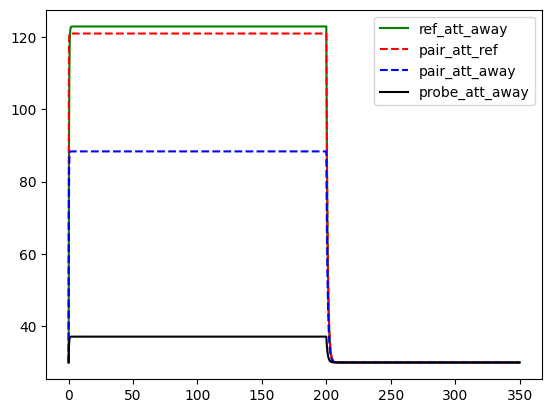

In [9]:
model = BiasedCompetitionModel(**model_params)

for i, (case, values) in enumerate(cases.items()):
    ys = model.run_simulation(**values)
    plt.plot(model.t_range, ys, styles[i], label=case)

plt.legend(loc="upper right");

## Original Plot

<img src=https://www.researchgate.net/profile/Richard_Wezel/publication/224015518/figure/fig2/AS:213837023322122@1427994127491/When-presented-with-two-visual-stimuli-simultaneously-attention-can-lead-to-changes-in.png>